<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_Exploratoria_de_Dados/blob/main/AED_3_ex_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Estatística Descritiva em R
---

# Exercícios

## Exercício 1

Considere a base.

In [1]:
df = read.csv('http://meusite.mackenzie.br/rogerio/TIC/Life_Expectancy_Data.csv')
df = na.omit(df)
head(df)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


1. Explore os dados. Quantos registros, quantidade de atributos, período etc.

**Solução**

In [2]:
nrow(df)
ncol(df)
table(df$Status)
unique(df$Year)

[1] 1649

[1] 22


 Developed Developing 
       242       1407 

[1] 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
[16] 2000

2. Selecione somente os dados de 2014 e empregue eles nos exercícios a seguir. Verifique a quantidade de registros resultante.

**Solução**

In [3]:
df = df[df$Year == 2014,]
nrow(df)

[1] 131

3. Qual a média de Expectativa de Vida para os países em desenvolvimento e desenvolvidos em 2014?

**Solução**

In [4]:
for (s in unique(df$Status)){
  cat('\n', s , '\n',  mean(df[df$Status == s, ]$Life.expectancy) )
}


 Developing 
 68.7375
 Developed 
 81.02632

4. Qual a média, mediana e quartis de BMI e Expectativa de Vida para os países desenvolvidos em 2014?

**Solução**

In [5]:
summary( df[df$Status == 'Developed', c('BMI','Life.expectancy')] )

      BMI        Life.expectancy
 Min.   : 6.70   Min.   :73.40  
 1st Qu.:59.40   1st Qu.:77.55  
 Median :61.90   Median :81.70  
 Mean   :53.73   Mean   :81.03  
 3rd Qu.:63.25   3rd Qu.:82.65  
 Max.   :69.20   Max.   :89.00  

5. Qual a média e desvio padrão para os valores de BMI e Expectativa de Vida para os países em desenvolvimento e desenvolvidos em 2014?

**Solução**

In [6]:
for (s in unique(df$Status)){
  cat('\n', s , '\nLife',  mean(df[df$Status == s, ]$Life.expectancy),
      sd(df[df$Status == s, ]$Life.expectancy))
  cat('\nBMI',  mean(df[df$Status == s, ]$BMI),
      sd(df[df$Status == s, ]$BMI))
}


 Developing 
Life 68.7375 7.802784
BMI 38.22679 19.91127
 Developed 
Life 81.02632 4.803337
BMI 53.73158 21.0463

6. Existe correlação significativa entre BMI e Expectativa de Vida para os desenvolvidos em 2014?

**Solução**

In [7]:
cor(df[df$Status == 'Developed', ]$Life.expectancy,df[df$Status == 'Developed', , ]$BMI)
# Próximo de 0, não existe correlação

[1] -0.05476602

7. E para países em desenvolvimento, existe correlação significativa entre BMI e Expectativa de Vida em 2014?

**Solução**

In [8]:
cor(df[df$Status == 'Developing', ]$Life.expectancy,df[df$Status == 'Developing', , ]$BMI)
# Próximo de 1, existe correlação positiva!

[1] 0.5730623

8. Leia os dados novamente com todos os anos. Existem *outliers* de BMI e Expectativa de Vida no conjunto de todos os países? Se sim, quantos dados são outliers? (empregue o critério dos interquartis)

DICA: empregue o comando `df = na.omit(df)` para eliminar valores ausentes nos dados como fizemos no início do exercício.

**Solução**

In [27]:
df = read.csv('http://meusite.mackenzie.br/rogerio/TIC/Life_Expectancy_Data.csv')
df = na.omit(df)

require(stats)
iqr = IQR(df$BMI)

nrow(df[ (df$BMI > quantile(df$BMI,0.75) + 1.5*iqr) |
          (df$BMI < quantile(df$BMI,0.25) - 1.5*iqr), ])

# iqr = IQR(df$Life.expectancy)

[1] 0

In [26]:
quantile(df$BMI,0.25)

25% 
19.5

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


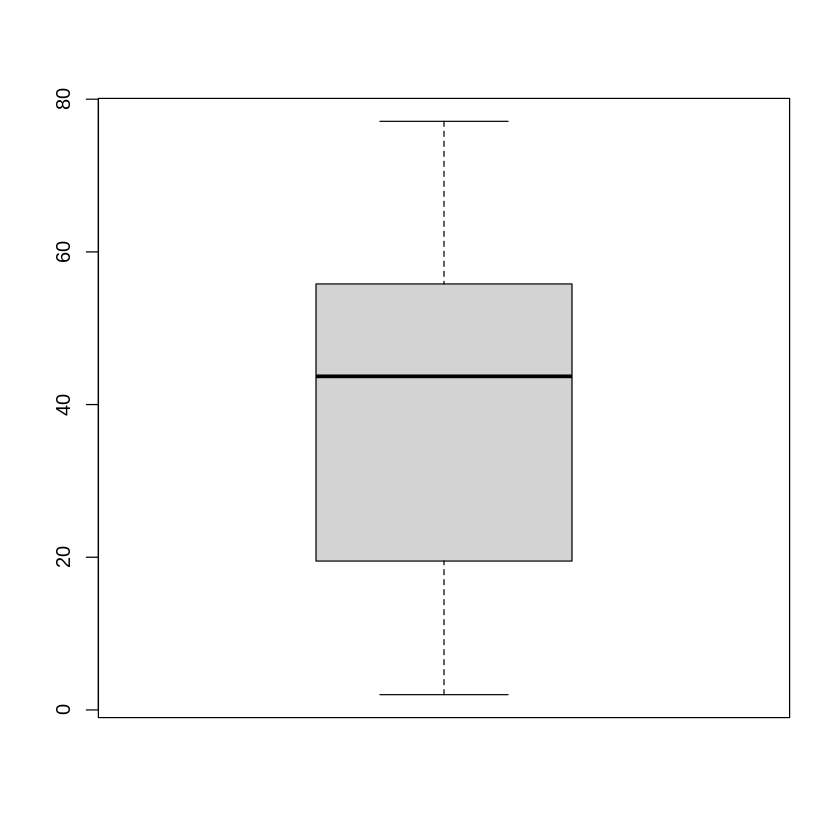

[1] 0

[1] 39

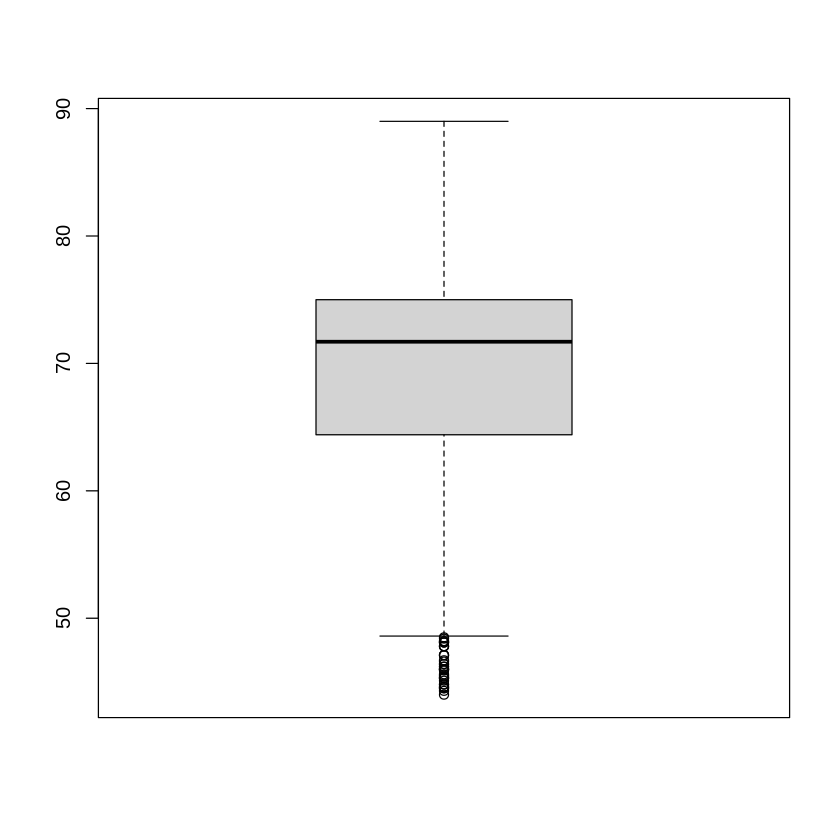

In [28]:
df = read.csv('http://meusite.mackenzie.br/rogerio/TIC/Life_Expectancy_Data.csv')
df = na.omit(df)
head(df)

boxplot(df$BMI)
boxplot(df$Life.expectancy)

require(stats)
iqr = IQR(df$BMI)

nrow(df[ (df$BMI > quantile(df$BMI,0.75) + 1.5*iqr) |
          (df$BMI < quantile(df$BMI,0.25) - 1.5*iqr), ])

iqr = IQR(df$Life.expectancy)

nrow(df[ (df$Life.expectancy > quantile(df$Life.expectancy,0.75) + 1.5*iqr) |
          (df$Life.expectancy < quantile(df$Life.expectancy,0.25) - 1.5*iqr), ])

# existem outliers somente para Life.expectancy, 39 valores

9. Qual a média de Expectativa de Vida com e sem *outliers* (lembre-se de considerar aqui a base completa)?

**Solução**

In [29]:
require(stats)
iqr = IQR(df$Life.expectancy)

mean(df[ - ( (df$Life.expectancy > quantile(df$Life.expectancy,0.75) + 1.5*iqr) |
          (df$Life.expectancy < quantile(df$Life.expectancy,0.25) - 1.5*iqr) ), ]$Life.expectancy)

mean(df$Life.expectancy)

[1] 69.30492

[1] 69.3023

## Exercício 2
Considere a base.

In [22]:
library(MASS)
# help(painters)
painters = na.omit(painters)
head(painters)

,Composition,Drawing,Colour,Expression,School,Score
,<int>,<int>,<int>,<int>,<fct>,<int>
Da Udine,10,8,16,3,A,37
Da Vinci,15,16,4,14,A,49
Del Piombo,8,13,16,7,A,44
Del Sarto,12,16,9,8,A,45
Fr. Penni,0,15,8,0,A,23
Guilio Romano,15,16,4,14,A,49


1. Quantos tipos de escolas de pintores existem?

**Solução**

In [12]:
unique(painters$School)
table(painters$School)

[1] A B C D E F G H
Levels: A B C D E F G H


 A  B  C  D  E  F  G  H 
10  6  6 10  7  4  7  4 

2. Qual a *moda* das escolas de pintores?

**Solução**

In [13]:
table(painters$School)
# Podemos ver que 'D' é o valor mais frequente


 A  B  C  D  E  F  G  H 
10  6  6 10  7  4  7  4 

3. Quantos pintores estão acima da média em composição?

**Solução**

In [14]:
nrow(painters[painters$Composition >= mean(painters$Composition), ])

[1] 31

4. Qual o pintor ou pintores com maior pontuação considerando todos os critérios? Não há muita surpresa aqui não?

DICA: crie uma nota com a soma de todas as pontuações dos pintores.

**Solução**

In [15]:
painters['Score'] = painters[,c(1)] + painters[,c(2)] + painters[,c(3)] + painters[,c(4)]
head(painters)
painters[painters$Score == max(painters$Score), ]

,Composition,Drawing,Colour,Expression,School,Score
,<int>,<int>,<int>,<int>,<fct>,<int>
Da Udine,10,8,16,3,A,37
Da Vinci,15,16,4,14,A,49
Del Piombo,8,13,16,7,A,44
Del Sarto,12,16,9,8,A,45
Fr. Penni,0,15,8,0,A,23
Guilio Romano,15,16,4,14,A,49


,Composition,Drawing,Colour,Expression,School,Score
,<int>,<int>,<int>,<int>,<fct>,<int>
Raphael,17,18,12,18,A,65
Rubens,18,13,17,17,G,65


5. Explore a mediana e média através das notas de Composição e Colour dos pintores.

**Solução**

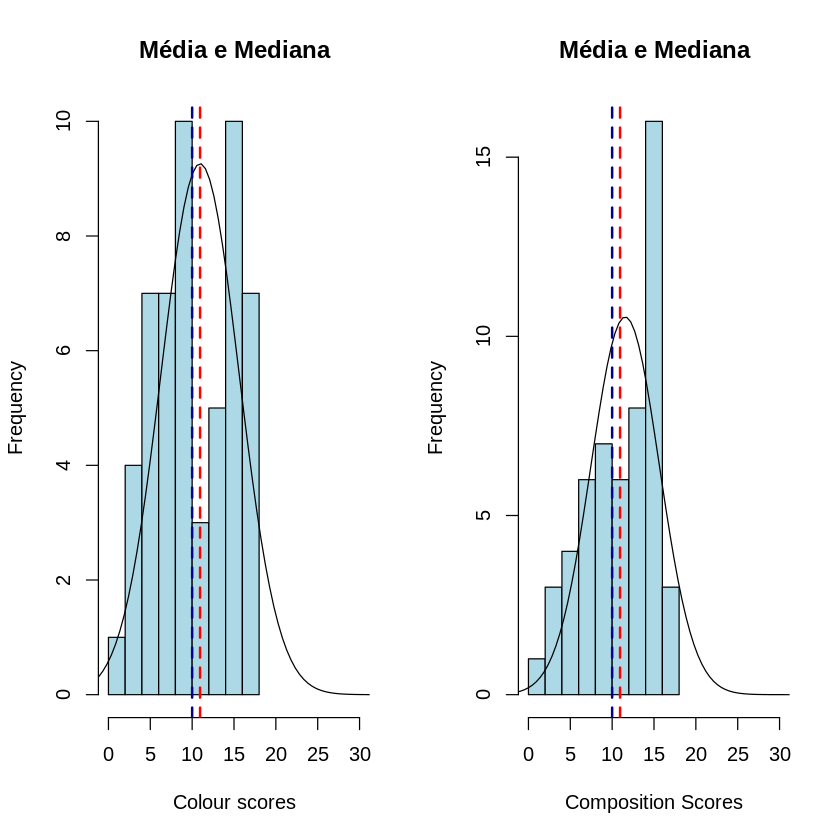

In [16]:
# Faremos uma exploração gráfica empregando vários recursos avançados aqui apenas para 
# você 'visualizar' as relações entre a média e mediana, o que pode ser bastante útil 
# para você. Mas sua solução solução pode mesmo ser simples e apenas comparar os valores. ;-)

par(mfrow = c(1, 2))
x = painters$Colour
h = hist(x, col="lightblue", xlab="Colour scores", main="Média e Mediana", xlim=c(0,30))
xfit = seq(min(x)-3*sd(x),max(x)+4*sd(x),length=100)
yfit = dnorm(xfit,mean=mean(x),sd=sd(x))
yfit = yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="black", lwd=1)
abline(v=mean(painters$Colour),col='red',lty = 2, lwd = 2)
abline(v=median(painters$Colour),col='darkblue',lty = 2, lwd = 2)

x = painters$Composition
h = hist(x, col="lightblue", xlab="Composition Scores", main="Média e Mediana", xlim=c(0,30))
xfit = seq(min(x)-3*sd(x),max(x)+4*sd(x),length=100)
yfit = dnorm(xfit,mean=mean(x),sd=sd(x))
yfit = yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="black", lwd=1)
abline(v=mean(painters$Colour),col='red',lty = 2, lwd = 2)
abline(v=median(painters$Colour),col='darkblue',lty = 2, lwd = 2)

## Exercício 3

> *Os exercícios a seguir são conceituais e não requerem qualquer código.*

1. A mediana e desvio padrão são estatísticas que ajudam a compreender:

  a. A centralidade e dispersão dos dados

  b. A centralidade dos dados

  c. A dispersão dos dados

  d. A posição dos dados

  e. Nenhuma das alternativas

**Solução**

In [17]:
# a

2. Um conjunto de dados com um desvio padrão alto:

  a. Está mais concentrado

  b. É mais disperso

  c. Apresenta média e medianas próximas

  d. Apresenta média e medianas distantes
  
  e. Nenhuma das alternativas

**Solução**

In [18]:
# b

3. Uma correlação, entre duas variáveis, próxima de zero indica que:

  a. As variáveis são independentes

  b. As variáveis não tem relação

  c. As variáveis não tem relação linear

  d. As variáveis apresentam valores muito iguais
  
  e. Nenhuma das alternativas

**Solução**

In [19]:
# c

4. Outliers nos dados ser encontrados por:

  a. Erros de medida

  b. Erro na entrada dos dados

  c. Ruído nos dados (interferências)

  d. Valores legítimos mas que de fato se destacam do padrão dos dados

  e. Todas as alternativas

**Solução**

In [20]:
# e

5. Sobre o desvio padrão:

  i. Diferentemente da variância encontra-se na mesma unidade que os dados

  ii. É igual ao quadrado da variância

  iii. É uma medida de dispersão dos dados

  São corretas:

  a. Somente i

  b. Somente i, ii

  c. Somente i, iii

  d. Somente ii, iii

  e. Todas

**Solução**

In [21]:
# c